In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. 選擇3個⽉到期與10年到期的債券, 分別計算資料期間內的報酬率並以表格呈現結果

In [288]:
df_3m = pd.read_csv(r'C:\Users\linnn\Desktop\加密貨幣金融\US_3m.csv')
df_10y = pd.read_csv(r'C:\Users\linnn\Desktop\加密貨幣金融\US_10y.csv')

In [289]:
df_3m = df_3m[['收市']]
df_3m.columns = ['price']
df_3m['ROI_3m'] = df_3m.price.pct_change()
df_3m.head(10)

,price,ROI_3m
0,4.2061,NaN
1,4.0900,-0.027603
2,4.1804,0.022103
3,4.1180,-0.014927
4,4.1350,0.004128
5,4.1380,0.000726
6,4.1540,0.003867
7,4.0900,-0.015407
8,4.1184,0.006944
9,4.0820,-0.008838


In [290]:
df_10y = df_10y[['收市']]
df_10y.columns = ['price']
df_10y['ROI_10y'] = df_10y.pct_change()
df_10y.head(10)

,price,ROI_10y
0,4.210,NaN
1,4.218,0.001900
2,4.163,-0.013039
3,4.163,0.000000
4,4.149,-0.003363
5,4.096,-0.012774
6,4.048,-0.011719
7,4.050,0.000494
8,4.018,-0.007901
9,4.010,-0.001991


In [294]:
com = pd.merge(df_3m,df_10y,left_index=True,right_index=True)
com

,price_x,ROI_3m,price_y,ROI_10y
0,4.2061,NaN,4.210,NaN
1,4.0900,-0.027603,4.218,0.001900
2,4.1804,0.022103,4.163,-0.013039
3,4.1180,-0.014927,4.163,0.000000
4,4.1350,0.004128,4.149,-0.003363
5,4.1380,0.000726,4.096,-0.012774
6,4.1540,0.003867,4.048,-0.011719
7,4.0900,-0.015407,4.050,0.000494
8,4.1184,0.006944,4.018,-0.007901
9,4.0820,-0.008838,4.010,-0.001991


In [295]:
com = com.drop(columns=['price_x'])
com = com.drop(columns=['price_y'])
com.columns = ['US_3_months_bond','US_10_years_bond']
com

,US_3_months_bond,US_10_years_bond
0,NaN,NaN
1,-0.027603,0.001900
2,0.022103,-0.013039
3,-0.014927,0.000000
4,0.004128,-0.003363
5,0.000726,-0.012774
6,0.003867,-0.011719
7,-0.015407,0.000494
8,0.006944,-0.007901
9,-0.008838,-0.001991


In [296]:
com.dropna()

,US_3_months_bond,US_10_years_bond
1,-0.027603,0.001900
2,0.022103,-0.013039
3,-0.014927,0.000000
4,0.004128,-0.003363
5,0.000726,-0.012774
6,0.003867,-0.011719
7,-0.015407,0.000494
8,0.006944,-0.007901
9,-0.008838,-0.001991
10,-0.008574,-0.020698


2. 選擇任⼀美股, 根據美股價格算出每⽇報酬率, 並計算出平均⽇報酬後進⾏年化, 得到年化後的平均報酬率

In [150]:
import yfinance as yf
df = yf.Ticker('GOOG').history(period='max')
df = df[['Close']]
df.columns = ['price']
df = df['2019':]
df

,price
Date,
2019-01-02,52.292500
2019-01-03,50.803001
2019-01-04,53.535500
2019-01-07,53.419498
2019-01-08,53.813999
...,...
2022-11-01,90.500000
2022-11-02,87.070000
2022-11-03,83.489998


In [151]:
ROI = df.price.pct_change()      #每日報酬
ROI = pd.DataFrame(ROI)
ROI

,price
Date,
2019-01-02,NaN
2019-01-03,-0.028484
2019-01-04,0.053786
2019-01-07,-0.002167
2019-01-08,0.007385
...,...
2022-11-01,-0.043947
2022-11-02,-0.037901
2022-11-03,-0.041116


In [153]:
start = '2019-01-02'
end = '2022-11-08'
df_slice = df.loc[start:end]
df_slice

,price
Date,
2019-01-02,52.292500
2019-01-03,50.803001
2019-01-04,53.535500
2019-01-07,53.419498
2019-01-08,53.813999
...,...
2022-11-01,90.500000
2022-11-02,87.070000
2022-11-03,83.489998


In [154]:
TR = df_slice.iloc[-1] / df_slice.iloc[0] - 1     #總報酬
TR

price    0.695272
dtype: float64

In [155]:
days = len(df_slice)
days

971

In [156]:
IRR = (1+TR)**(252/days)-1    #年化報酬率
IRR

price    0.146816
dtype: float64

3. 畫出比特幣價格趨勢圖

In [157]:
import yfinance as yf
btc = yf.Ticker('BTC-USD').history(period='max')
btc = btc[['Close']]
btc

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2022-11-04,21147.230469
2022-11-05,21282.691406
2022-11-06,20926.486328


<AxesSubplot:xlabel='Date'>

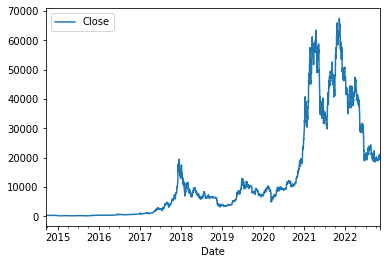

In [158]:
btc.plot()

4. 建立⼀資料表格, 欄位包含比特幣價格, 今⽇報酬率, 前⼀⽇報酬率, 共三個欄位變數


In [159]:
oo = btc.copy()
mm = btc.copy()
oo

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2022-11-04,21147.230469
2022-11-05,21282.691406
2022-11-06,20926.486328


In [160]:
#今日報酬率
today = float(oo.loc['2022-11-08'])
yesterday = float(oo.loc['2022-11-07'])
R = (today - yesterday) / yesterday
R = round(R,10)
R

-0.0415589988

In [161]:
#昨日報酬率
y = float(oo.loc['2022-11-07'])
yy = float(oo.loc['2022-11-06'])
f = (y - yy) / yy
f = round(f,10)
f

-0.015466998

In [162]:
mm = mm[-1:]
mm.columns = ['price']
mm['Today_ROI'] = R
mm['Yesterday_ROI'] = f
mm

,price,Today_ROI,Yesterday_ROI
Date,,,
2022-11-08,19746.583984,-0.041559,-0.015467


5. 我們根據以下條件計算其機率
  1. 在2022年, 比特幣⽇報酬率超過3%的機率
  2. 在資料期間, 比特幣⽇報酬率超過3%的機率
  3. 在資料期間, 比特幣⽇報酬率連續兩天超過3%的機率

In [9]:
#2022比特幣日報酬率
btcc = btc.copy()
btcc = btc['2022']
btcc.columns = ['price']
btcc['ROI'] = btcc.price.pct_change()     #每日報酬
btcc

<ipython-input-9-d11d59b0d9ca>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  btcc = btc['2022']
<ipython-input-9-d11d59b0d9ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btcc['ROI'] = btcc.price.pct_change()


,price,ROI
Date,,
2022-01-01,47686.812500,NaN
2022-01-02,47345.218750,-0.007163
2022-01-03,46458.117188,-0.018737
2022-01-04,45897.574219,-0.012066
2022-01-05,43569.003906,-0.050734
...,...,...
2022-10-29,20818.476562,0.010834
2022-10-30,20635.603516,-0.008784
2022-10-31,20495.773438,-0.006776


In [19]:
btcc['ROI'] > 0.03           #找出比特幣報酬>3%的資料

Date
2022-01-01    False
2022-01-02    False
2022-01-03    False
2022-01-04    False
2022-01-05    False
              ...  
2022-10-29    False
2022-10-30    False
2022-10-31    False
2022-11-01    False
2022-11-02    False
Name: ROI, Length: 306, dtype: bool

In [20]:
btcc[(btcc['ROI'] > 0.03)]

,price,ROI
Date,,
2022-01-23,36276.804688,0.035585
2022-02-04,41500.875000,0.116978
2022-02-07,43840.285156,0.033666
2022-02-15,44575.203125,0.046688
2022-02-22,38286.027344,0.032656
2022-02-28,43193.234375,0.145412
2022-03-09,41982.925781,0.083786
2022-03-14,39666.753906,0.048008
2022-03-16,41143.929688,0.045887


In [21]:
print('報酬高於3%的資料數量',len(btcc[(btcc['ROI'] > 0.03)]))
print('2022的資料總量',len(btcc))

報酬高於3%的資料數量 34
2022的資料總量 306


In [38]:
probability = len(btcc[(btcc['ROI'] > 0.03)]) / len(btcc) * 100
probability = round(probability,2)
probability

11.11

In [39]:
print('2022年, 比特幣⽇報酬率超過3%的機率',probability,'%')

2022年, 比特幣⽇報酬率超過3%的機率 11.11 %


在資料期間, 比特幣⽇報酬率超過3%的機率

In [28]:
btc2 = btc.copy()
btc2.columns = ['price']
btc2['ROI'] = btc2.price.pct_change()
btc2

,price,ROI
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,-0.071926
2014-09-19,394.795990,-0.069843
2014-09-20,408.903992,0.035735
2014-09-21,398.821014,-0.024659
...,...,...
2022-10-29,20818.476562,0.010834
2022-10-30,20635.603516,-0.008784
2022-10-31,20495.773438,-0.006776


In [31]:
print('到目前ROI>3%的資料量',len(btc2[(btc2['ROI'] > 0.03)]))
print('全部資料的總量',len(btc2))

到目前ROI>3%的資料量 464
全部資料的總量 2969


In [42]:
probability2 = len(btc2[(btc2['ROI'] > 0.03)]) / len(btc2) * 100
probability2 = round(probability2,2)
probability2

15.63

In [43]:
print('在資料期間, 比特幣⽇報酬率超過3%的機率',probability2,'%')

在資料期間, 比特幣⽇報酬率超過3%的機率 15.63 %


在資料期間, 比特幣⽇報酬率連續兩天超過3%的機率

In [64]:
pp = btc2[btc2['ROI'] > 0.03]
pp

,price,ROI
Date,,
2014-09-20,408.903992,0.035735
2014-09-23,435.790985,0.083647
2014-09-30,386.944000,0.030567
2014-10-08,352.940002,0.049832
2014-10-09,365.026001,0.034244
...,...,...
2022-09-22,19413.550781,0.046699
2022-10-03,19623.580078,0.030428
2022-10-04,20336.843750,0.036347


In [80]:
k = 0 
for i in range(len(pp)-1):
    if((pp.index[i+1] - pp.index[i]).days == 1) == True:
        print(pp.index[i+1])
        k += 1
print('在資料期間, 比特幣⽇報酬率連續兩天超過3%的機率的資料數量為',k,'筆')

2014-10-09 00:00:00
2014-10-13 00:00:00
2015-01-06 00:00:00
2015-02-02 00:00:00
2015-02-14 00:00:00
2015-08-20 00:00:00
2015-10-29 00:00:00
2015-10-30 00:00:00
2015-11-02 00:00:00
2015-11-03 00:00:00
2016-05-28 00:00:00
2016-06-12 00:00:00
2016-06-13 00:00:00
2016-06-24 00:00:00
2016-12-22 00:00:00
2016-12-23 00:00:00
2017-02-21 00:00:00
2017-03-12 00:00:00
2017-05-20 00:00:00
2017-05-23 00:00:00
2017-05-24 00:00:00
2017-05-29 00:00:00
2017-06-01 00:00:00
2017-06-02 00:00:00
2017-06-06 00:00:00
2017-07-18 00:00:00
2017-07-28 00:00:00
2017-08-04 00:00:00
2017-08-05 00:00:00
2017-08-12 00:00:00
2017-08-13 00:00:00
2017-08-14 00:00:00
2017-09-01 00:00:00
2017-09-06 00:00:00
2017-10-09 00:00:00
2017-10-13 00:00:00
2017-10-14 00:00:00
2017-11-01 00:00:00
2017-11-02 00:00:00
2017-11-16 00:00:00
2017-11-26 00:00:00
2017-11-27 00:00:00
2017-12-01 00:00:00
2017-12-07 00:00:00
2017-12-16 00:00:00
2018-02-09 00:00:00
2018-02-15 00:00:00
2018-02-27 00:00:00
2018-03-19 00:00:00
2018-03-20 00:00:00


In [85]:
pro = k / len(btc2) * 100
pro = round(pro,2)
print('在資料期間, 比特幣⽇報酬率連續兩天超過3%的機率為',pro,'%')

在資料期間, 比特幣⽇報酬率連續兩天超過3%的機率為 2.93 %


6. 計算美股個股, 股價指數和比特幣⽇報酬率計算出年化平均⽇報酬, 年化標準差, 最⼤與最⼩值, 以表
格⽅式呈現

In [163]:
google = yf.Ticker('GOOG').history(period='max')
google = google['2016':]
google = google[['Close']]
google.columns = ['price']
google['ROI'] = google.price.pct_change()
google

,price,ROI
Date,,
2016-01-04,37.091999,NaN
2016-01-05,37.129002,0.000998
2016-01-06,37.181000,0.001400
2016-01-07,36.319500,-0.023170
2016-01-08,35.723499,-0.016410
...,...,...
2022-11-01,90.500000,-0.043947
2022-11-02,87.070000,-0.037901
2022-11-03,83.489998,-0.041116


In [164]:
btc3 = btc.copy()
btc3 = btc3['2016':]
btc3.columns = ['price']
btc3['ROI'] = btc3.price.pct_change()
btc3

,price,ROI
Date,,
2016-01-01,434.334015,NaN
2016-01-02,433.437988,-0.002063
2016-01-03,430.010986,-0.007907
2016-01-04,433.091003,0.007163
2016-01-05,431.959991,-0.002611
...,...,...
2022-11-04,21147.230469,0.046375
2022-11-05,21282.691406,0.006406
2022-11-06,20926.486328,-0.016737


In [165]:
mm = pd.merge(btc3['ROI'],google['ROI'],left_index=True,right_index=True)
mm

,ROI_x,ROI_y
Date,,
2016-01-04,0.007163,NaN
2016-01-05,-0.002611,0.000998
2016-01-06,-0.006609,0.001400
2016-01-07,0.067450,-0.023170
2016-01-08,-0.010519,-0.016410
...,...,...
2022-11-01,-0.000512,-0.043947
2022-11-02,-0.015903,-0.037901
2022-11-03,0.002504,-0.041116


In [166]:
mm = mm.dropna(axis=0)          #刪除缺失值
mm

,ROI_x,ROI_y
Date,,
2016-01-05,-0.002611,0.000998
2016-01-06,-0.006609,0.001400
2016-01-07,0.067450,-0.023170
2016-01-08,-0.010519,-0.016410
2016-01-11,0.000975,0.002183
...,...,...
2022-11-01,-0.000512,-0.043947
2022-11-02,-0.015903,-0.037901
2022-11-03,0.002504,-0.041116


In [169]:
mm['ROI_x'][0] + mm['ROI_x'][1]

-0.009220851204396863

In [168]:
#比特幣長年下來平均日報酬率
total_btc = 0
for i in range(len(mm)):
    total_btc += mm['ROI_x'][i]
total_btc = round(total_btc / len(mm),7)

print(total_btc)

0.0025485


In [167]:
#Google長年下來平均日報酬率
total_google = 0
for i in range(len(mm)):
    total_google += mm['ROI_y'][i]
total_google = round(total_google / len(mm),7)
print(total_google)

0.0006606


In [174]:
#套入年化報酬率公式
IRR_btc = round((1 + total_btc)** (1/6) -1,7)
IRR_btc

0.0004243

In [175]:
#套入年化報酬率公式
IRR_google = round((1+total_google)**(1/6) - 1,7)
IRR_google                                       # Google的年化日報酬

0.0001101

年化標準差

In [176]:
mm

,ROI_x,ROI_y
Date,,
2016-01-05,-0.002611,0.000998
2016-01-06,-0.006609,0.001400
2016-01-07,0.067450,-0.023170
2016-01-08,-0.010519,-0.016410
2016-01-11,0.000975,0.002183
...,...,...
2022-11-01,-0.000512,-0.043947
2022-11-02,-0.015903,-0.037901
2022-11-03,0.002504,-0.041116


In [177]:
dr = mm
risk = dr.std()
risk

ROI_x    0.04214
ROI_y    0.01760
dtype: float64

In [178]:
risk_y = risk * 252 ** 0.5
risk_y

ROI_x    0.668947
ROI_y    0.279388
dtype: float64

<AxesSubplot:xlabel='Date'>

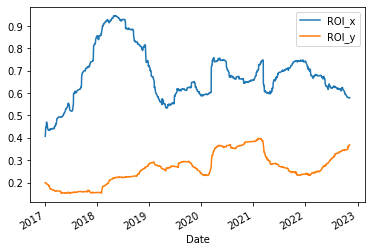

In [179]:
#年均線
rolling_risk = dr.rolling(252).std() *252 ** 0.5
rolling_risk.dropna().plot()

In [180]:
data = pd.DataFrame({IRR_btc},columns=['BTC 年化平均日報酬'])
data['Google 年化平均日報酬'] = IRR_google
data['BTC年化標準差'] = round(risk[0],4)
data['Google年化標準差'] = round(risk[1],4)
data['BTC日報酬率中最大值'] = mm['ROI_x'].max()
data['BTC日報酬率中最小值'] = mm['ROI_x'].min()
data['Google日報酬率中最大值'] = mm['ROI_x'].max()
data['Google日報酬率中最小值'] = mm['ROI_y'].min()
data = data.transpose()
data.columns = ['報酬率']
data

,報酬率
BTC 年化平均日報酬,0.000424
Google 年化平均日報酬,0.000110
BTC年化標準差,0.042100
Google年化標準差,0.017600
BTC日報酬率中最大值,0.252472
BTC日報酬率中最小值,-0.371695
Google日報酬率中最大值,0.252472
Google日報酬率中最小值,-0.111008


7. 計算美股股價指數⽇報酬(S&P 500 index)與比特幣⽇報酬之相關係數

In [183]:
import yfinance as yf
sp = yf.Ticker('^GSPC').history(period='max')
sp = sp[['Close']]
sp = sp['2016':]
sp.columns = ['price']
sp['ROI'] = sp.price.pct_change()
sp = sp.dropna()
sp = sp.drop(columns=['price'])
sp

,ROI
Date,
2016-01-05,0.002012
2016-01-06,-0.013115
2016-01-07,-0.023700
2016-01-08,-0.010838
2016-01-11,0.000853
...,...
2022-11-01,-0.004101
2022-11-02,-0.025002
2022-11-03,-0.010586


In [184]:
btc = yf.Ticker('BTC-USD').history(period='max')
btc = btc[['Close']]
btc.columns = ['price']
btc = btc['2016':]
btc['ROI'] = btc.price.pct_change()
btc = btc.dropna()
btc = btc.drop(columns=['price'])
btc

,ROI
Date,
2016-01-02,-0.002063
2016-01-03,-0.007907
2016-01-04,0.007163
2016-01-05,-0.002611
2016-01-06,-0.006609
...,...
2022-11-04,0.046375
2022-11-05,0.006406
2022-11-06,-0.016737


In [228]:
combine = pd.merge(sp,btc,left_index=True,right_index=True)
combine.columns = ['SP500','BTC']
corr = combine['SP500'].corr(combine['BTC'])
corr = round(corr,5)
print(f"S&P 500 index與比特幣⽇報酬之相關係數為 {{}} ".format(corr))

S&P 500 index與比特幣⽇報酬之相關係數為 0.23268 


8. 若要得到更進⼀步的實證結果, 我們可利⽤同期模型
了解兩變數的同期關係. 或者使⽤跨期模型(或是預測模型)

In [229]:
#同期模型
import statsmodels.api as sm
y = combine.BTC
x = sm.add_constant(combine[['SP500']])
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     98.57
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.26e-22
Time:                        19:34:56   Log-Likelihood:                 3061.7
No. Observations:                1724   AIC:                            -6119.
Df Residuals:                    1722   BIC:                            -6109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.001      2.216      0.0

1. Beta不顯著，因p-value < 0.05
2. 比特幣易受美股影響

In [230]:
#預測模型(t-1)
combine['ROI_1'] = combine.SP500.shift()
y = combine.BTC.shift()
combine

,SP500,BTC,ROI_1
Date,,,
2016-01-05,0.002012,-0.002611,NaN
2016-01-06,-0.013115,-0.006609,0.002012
2016-01-07,-0.023700,0.067450,-0.013115
2016-01-08,-0.010838,-0.010519,-0.023700
2016-01-11,0.000853,0.000975,-0.010838
...,...,...,...
2022-11-01,-0.004101,-0.000512,-0.007454
2022-11-02,-0.025002,-0.015903,-0.004101
2022-11-03,-0.010586,0.002504,-0.025002


In [231]:
x = sm.add_constant(combine[['ROI_1']])
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     98.72
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.17e-22
Time:                        19:35:08   Log-Likelihood:                 3059.7
No. Observations:                1723   AIC:                            -6115.
Df Residuals:                    1721   BIC:                            -6104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.001      2.229      0.0

1. 比特幣對於美股有正向的預測能力
2. 兩者在未來仍呈現高度耦合

In [251]:
#預測模型(t-2)
combine['ROI_2'] = combine.SP500.shift(2)
y = combine.BTC.shift(2)
x = sm.add_constant(combine[['ROI_2']])
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     98.21
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.49e-22
Time:                        19:48:55   Log-Likelihood:                 3057.7
No. Observations:                1722   AIC:                            -6111.
Df Residuals:                    1720   BIC:                            -6101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.001      2.210      0.0

1. 比特幣對於美股有正向的預測能力
2. 兩者在未來仍呈現高度耦合
3. 落後期1和2，預測結果相近

In [252]:
#預測模型(t-3)
combine['ROI_3'] = combine.SP500.shift(3)
y = combine.BTC.shift(3)
x = sm.add_constant(combine[['ROI_3']])
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     98.21
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.50e-22
Time:                        19:50:21   Log-Likelihood:                 3055.5
No. Observations:                1721   AIC:                            -6107.
Df Residuals:                    1719   BIC:                            -6096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.001      2.203      0.0

1. 比特幣對於美股有正向的預測能力
2. 兩者在未來仍呈現高度耦合
3. 落後期1和2和3，預測結果相近

In [234]:
combine

,SP500,BTC,ROI_1,ROI_2,ROI_3
Date,,,,,
2016-01-05,0.002012,-0.002611,NaN,NaN,NaN
2016-01-06,-0.013115,-0.006609,0.002012,NaN,NaN
2016-01-07,-0.023700,0.067450,-0.013115,0.002012,NaN
2016-01-08,-0.010838,-0.010519,-0.023700,-0.013115,0.002012
2016-01-11,0.000853,0.000975,-0.010838,-0.023700,-0.013115
...,...,...,...,...,...
2022-11-01,-0.004101,-0.000512,-0.007454,0.024626,-0.006083
2022-11-02,-0.025002,-0.015903,-0.004101,-0.007454,0.024626
2022-11-03,-0.010586,0.002504,-0.025002,-0.004101,-0.007454


1. 落後期t-2和t-3會有差異
2. 比特幣對於美股有正向的預測能力
3. 觀察得出t-1 和 t-3時，具有正向的預測能力

9. 請⾃⾏挑選⼀加密貨幣(除了比特幣)與⼀傳統⾦融資產(非加密貨幣相關資產)進⾏ 第8題的實證分析 ,並說明其結果

In [212]:
ETH = yf.Ticker('ETH-USD').history(period='max')
ETH = ETH[['Close']]
ETH.columns = ['price']
ETH['ROI_e'] = ETH.price.pct_change()
ETH = ETH.dropna()
ETH = ETH.drop(columns=['price'])
ETH

,ROI_e
Date,
2017-11-10,-0.067411
2017-11-11,0.051555
2017-11-12,-0.021523
2017-11-13,0.028606
2017-11-14,0.066037
...,...
2022-11-04,0.074142
2022-11-05,-0.010410
2022-11-06,-0.034235


<AxesSubplot:xlabel='Date'>

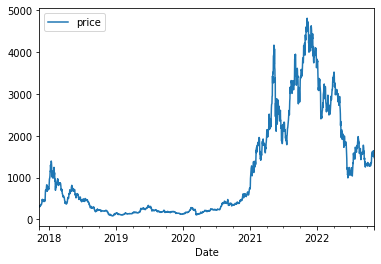

In [199]:
ETH.plot()

In [208]:
apple = yf.Ticker('AAPL').history(period='max')
apple = apple[['Close']]
apple.columns = ['price']
apple = apple['2017-11-09':]
apple['ROI_a'] = apple.price.pct_change()
apple = apple.dropna()
apple = apple.drop(columns=['price'])
apple

,ROI_a
Date,
2017-11-10,-0.003310
2017-11-13,-0.004008
2017-11-14,-0.015118
2017-11-15,-0.013190
2017-11-16,0.011947
...,...
2022-11-01,-0.017543
2022-11-02,-0.037305
2022-11-03,-0.042405


In [239]:
ccc = pd.merge(ETH,apple,left_index=True,right_index=True)
ccc.columns = ['ETH','AAPL']
ccc

,ETH,AAPL
Date,,
2017-11-10,-0.067411,-0.003310
2017-11-13,0.028606,-0.004008
2017-11-14,0.066037,-0.015118
2017-11-15,-0.012659,-0.013190
2017-11-16,-0.007298,0.011947
...,...,...
2022-11-01,0.004445,-0.017543
2022-11-02,-0.037977,-0.037305
2022-11-03,0.007784,-0.042405


In [242]:
#同期模型
import statsmodels.api as sm
y = ccc.ETH
x = sm.add_constant(ccc[['AAPL']])
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    ETH   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     84.20
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.79e-19
Time:                        19:38:50   Log-Likelihood:                 1924.0
No. Observations:                1256   AIC:                            -3844.
Df Residuals:                    1254   BIC:                            -3834.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      0.391      0.6

1. p-value > 0.05，Beta顯著(表示自變項對依變項影響顯著)，兩者會高度互相牽動
2. 以太幣易受蘋果公司的股價影響

In [246]:
#預測模型(t-1)
ccc['ROI_1'] = ccc.ETH.shift()
y = ccc.AAPL.shift()
x = sm.add_constant(ccc[['ROI_1']])
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     84.14
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.84e-19
Time:                        19:44:48   Log-Likelihood:                 3122.5
No. Observations:                1255   AIC:                            -6241.
Df Residuals:                    1253   BIC:                            -6231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.836      0.0

1. 以太幣對蘋果公司的股票有正向的預測能力
2. 兩者在未來仍呈現高度耦合
3. Beta值顯著，p-value > 0.05

In [248]:
#預測模型(t-2)
ccc['ROI_2'] = ccc.ETH.shift(2)
y = ccc.AAPL.shift(2)
x = sm.add_constant(ccc[['ROI_2']])
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     84.32
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.69e-19
Time:                        19:46:12   Log-Likelihood:                 3119.7
No. Observations:                1254   AIC:                            -6235.
Df Residuals:                    1252   BIC:                            -6225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.849      0.0

1. 以太幣對蘋果公司的股票有正向的預測能力
2. 兩者在未來仍呈現高度耦合
3. 落後期1和2，預測結果相近
4. Beta值顯著，p-value > 0.05

In [253]:
#預測模型(t-3)
ccc['ROI_3'] = ccc.ETH.shift(3)
y = ccc.AAPL.shift(3)
x = sm.add_constant(ccc[['ROI_3']])
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     84.71
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.40e-19
Time:                        19:54:25   Log-Likelihood:                 3119.1
No. Observations:                1253   AIC:                            -6234.
Df Residuals:                    1251   BIC:                            -6224.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.913      0.0

1. 以太幣對蘋果公司的股票有正向的預測能力
2. 兩者在未來仍呈現高度耦合
3. 落後期1和2和3，預測結果相近
4. Beta值顯著，p-value > 0.05

In [254]:
ccc

,ETH,AAPL,ROI_1,ROI_2,ROI_3
Date,,,,,
2017-11-10,-0.067411,-0.003310,NaN,NaN,NaN
2017-11-13,0.028606,-0.004008,-0.067411,NaN,NaN
2017-11-14,0.066037,-0.015118,0.028606,-0.067411,NaN
2017-11-15,-0.012659,-0.013190,0.066037,0.028606,-0.067411
2017-11-16,-0.007298,0.011947,-0.012659,0.066037,0.028606
...,...,...,...,...,...
2022-11-01,0.004445,-0.017543,-0.011358,0.027142,-0.033316
2022-11-02,-0.037977,-0.037305,0.004445,-0.011358,0.027142
2022-11-03,0.007784,-0.042405,-0.037977,0.004445,-0.011358
